## This file is for the penultimate development of this 4-Level Model

##### TRAINING SUBSECTION

In [1]:
'''NOTE Load in the training data for level-0 models'''

import _Data_Processing
import joblib
from importlib import reload

'''
this function returns 7 objects:
	data: sets of data as X_train, X_val, X_ind, y_train, y_val, y_ind
	feature_list: list of all feature names with a column index (dict)
'''

reload(_Data_Processing)

lstm_format = False

X, X_train, X_val, X_ind,\
y, y_train, y_val, y_ind,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_full.csv'
	,indp_size  =		0.01
	,test_size  =		0.20
	,shfl_splt	=		False
	,t_start    =		570
	,t_end		=		720
	,mod_type	=		'Area_Classification'
	,target_t	=		15
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Standard'
	,frmt_lstm	=		lstm_format
	,keep_price =		True
	,optm_data	=		True
    ,indices	=		0
)
joblib.dump(scaler, 'scaler/tmp.joblib')

Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 125400164 -> 64675164
loaded chunk 2 of size: 125400164 -> 64575164
loaded chunk 3 of size: 125400164 -> 64675164
loaded chunk 4 of size: 125400164 -> 64675164
loaded chunk 5 of size: 125400164 -> 64675164
loaded chunk 6 of size: 125400164 -> 64675164
loaded chunk 7 of size: 125400164 -> 64675164
loaded chunk 8 of size: 125400164 -> 64575164
loaded chunk 9 of size: 125400164 -> 64675164
loaded chunk 10 of size: 7905380 -> 3951196
concat chunks
concatted chunks
Success.
Size of dataset:	586152276
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success...

# of Samples:	226576

# of Features:	519

Target:		tc_2a_15m

Trying to split DataFrame into X and y...Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training fe

['scaler/tmp.joblib']

In [2]:
'''NOTE Shred the data to run parallel to desired level-0 structure'''

import _Data_Rotating
from importlib import reload
'''
This function returns 4 items.
-	2D array of X partitions, by featurespace and samplespace
-	1D array of index-lists for each featurespace-partition specific features
-	1D array of featurespace-partition specific rotation transformer functions
-	1D array of y partitions for each samplespace partition.
'''

reload(_Data_Rotating)

X_train_parts, X_find_parts, X_trans_parts, y_parts = _Data_Rotating.rotate_partitions(
	X				=	X_train
	,y				=	y_train
	,n_feat_parts	=	2
	,feat_subsets	=	feature_subsets
	,feat_part_type	=	'by_subset'
	,fraction_feats	=	0.85
	,no_feat_overlap=	False
	,feats_for_all	=	[]
	,rotation_type	=	'PCA'
	,rotation_filter=	False
	,filter_type	=	'Retention'
	,filter_value	=	0.95
	,n_sample_parts	=	4
	,smpl_part_type	=	'Random'
	,sample_overlap	=	0.9
	,sample_shuffle	=	False
	,lstm_format	=	lstm_format
)

2025-02-04 11:36:27.314109: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-04 11:36:27.325539: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738686987.335708   59200 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738686987.338580   59200 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-04 11:36:27.350164: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

Custom parameters selected.
nn	-	{'optimizer_type': 'Adam', 'optimizer_kwarg': {'learning_rate': 0.0005}, 'time_steps': 5, 'LSTM': False, 'shuffle_train': True, 'epochs': 8, 'rlr_patience': 20, 'architecture': 'default_deep'}
Running on: GPU



I0000 00:00:1738686989.028088   59200 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1962 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1060 3GB, pci bus id: 0000:01:00.0, compute capability: 6.1


Training model #1
Running on: GPU

Epoch 1/8


I0000 00:00:1738686993.354730   59335 service.cc:148] XLA service 0x7fbfbc003a70 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1738686993.354765   59335 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce GTX 1060 3GB, Compute Capability 6.1
2025-02-04 11:36:33.429292: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1738686993.820398   59335 cuda_dnn.cc:529] Loaded cuDNN version 90300


15/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5067 - loss: 0.8065 - precision: 0.4957 - recall: 0.4233 

I0000 00:00:1738686997.786836   59335 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 356ms/step - accuracy: 0.5048 - loss: 0.8098 - precision: 0.4988 - recall: 0.4219 - val_accuracy: 0.5007 - val_loss: 0.7022 - val_precision: 0.5121 - val_recall: 0.8334 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4604 - loss: 0.8741 - precision: 0.4821 - recall: 0.4085 - val_accuracy: 0.4947 - val_loss: 0.6965 - val_precision: 0.5158 - val_recall: 0.4531 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5303 - loss: 0.8225 - precision: 0.5479 - recall: 0.4741 - val_accuracy: 0.5035 - val_loss: 0.6982 - val_precision: 0.5306 - val_recall: 0.3880 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5401 - loss: 0.7898 - precision: 0.5488 - recall: 0.4697 - val_accuracy: 0.4957 - val_loss: 0.6979 - val_precision: 0.5258 - val_recall: 0.3024 - learning_rate: 5.0000e-04
Epoch 5/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.

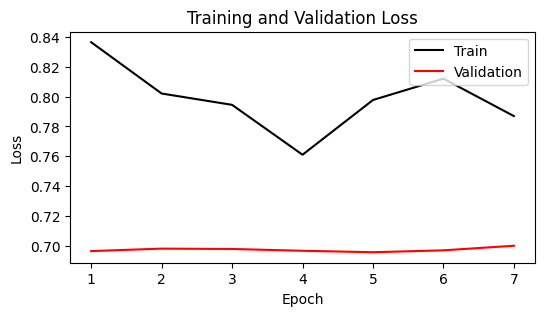

Running on: GPU

Training model #2
Running on: GPU

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.5045 - loss: 0.8677 - precision: 0.5293 - recall: 0.5302 - val_accuracy: 0.4762 - val_loss: 0.7308 - val_precision: 0.4716 - val_recall: 0.0640 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.4679 - loss: 0.9660 - precision: 0.4599 - recall: 0.4868 - val_accuracy: 0.5023 - val_loss: 0.7104 - val_precision: 0.5287 - val_recall: 0.3903 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4918 - loss: 0.9856 - precision: 0.4599 - recall: 0.5362 - val_accuracy: 0.5262 - val_loss: 0.7072 - val_precision: 0.5412 - val_recall: 0.5800 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5221 - loss: 0.8584 - precision: 0.5188 - recall: 0.5637 - val_accuracy: 0.5282 - val_loss: 0.7034 - val_precision: 0.5379 - val_recall: 0.6541 - learning_rate: 5.0000e-04
Epo

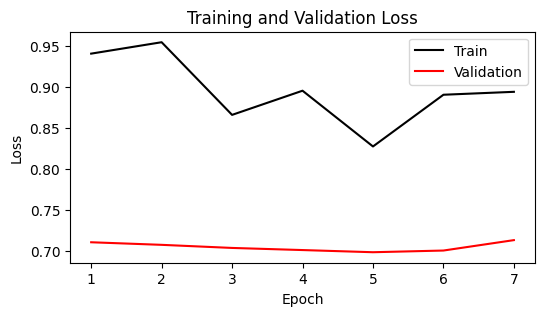

Running on: GPU

Training model #3
Running on: GPU

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 286ms/step - accuracy: 0.5150 - loss: 0.8644 - precision: 0.4973 - recall: 0.4755 - val_accuracy: 0.4967 - val_loss: 0.6962 - val_precision: 0.5165 - val_recall: 0.4963 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.4739 - loss: 0.8803 - precision: 0.5224 - recall: 0.4328 - val_accuracy: 0.4883 - val_loss: 0.6974 - val_precision: 0.5132 - val_recall: 0.3008 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4769 - loss: 0.9345 - precision: 0.4917 - recall: 0.4329 - val_accuracy: 0.5021 - val_loss: 0.6986 - val_precision: 0.5370 - val_recall: 0.3051 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5316 - loss: 0.8269 - precision: 0.5374 - recall: 0.5389 - val_accuracy: 0.5129 - val_loss: 0.6974 - val_precision: 0.5345 - val_recall: 0.4867 - learning_rate: 5.0000e-04
Ep

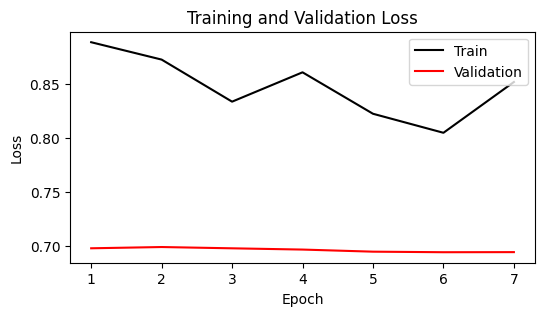

Running on: GPU

Training model #4
Running on: GPU

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 280ms/step - accuracy: 0.4739 - loss: 0.9012 - precision: 0.5346 - recall: 0.5443 - val_accuracy: 0.5205 - val_loss: 0.6963 - val_precision: 0.5202 - val_recall: 0.9973 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5965 - loss: 0.7701 - precision: 0.6479 - recall: 0.6325 - val_accuracy: 0.5199 - val_loss: 0.6993 - val_precision: 0.5200 - val_recall: 0.9923 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5131 - loss: 0.8529 - precision: 0.5107 - recall: 0.5762 - val_accuracy: 0.5223 - val_loss: 0.6990 - val_precision: 0.5223 - val_recall: 0.9472 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5413 - loss: 0.8130 - precision: 0.5943 - recall: 0.5877 - val_accuracy: 0.5181 - val_loss: 0.6992 - val_precision: 0.5204 - val_recall: 0.9310 - learning_rate: 5.0000e-04
Epo

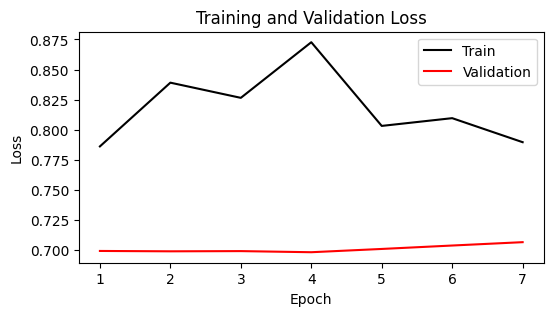

Running on: GPU

Training model #2
Running on: GPU

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 274ms/step - accuracy: 0.4849 - loss: 0.8957 - precision: 0.5272 - recall: 0.4584 - val_accuracy: 0.5063 - val_loss: 0.6955 - val_precision: 0.5205 - val_recall: 0.6379 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5166 - loss: 0.8155 - precision: 0.5674 - recall: 0.4828 - val_accuracy: 0.4933 - val_loss: 0.6985 - val_precision: 0.5159 - val_recall: 0.4057 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5175 - loss: 0.8392 - precision: 0.5532 - recall: 0.5161 - val_accuracy: 0.4997 - val_loss: 0.7003 - val_precision: 0.5342 - val_recall: 0.2923 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5464 - loss: 0.7944 - precision: 0.6327 - recall: 0.5089 - val_accuracy: 0.4989 - val_loss: 0.7033 - val_precision: 0.5368 - val_recall: 0.2615 - learning_rate: 5.0000e-04
Ep

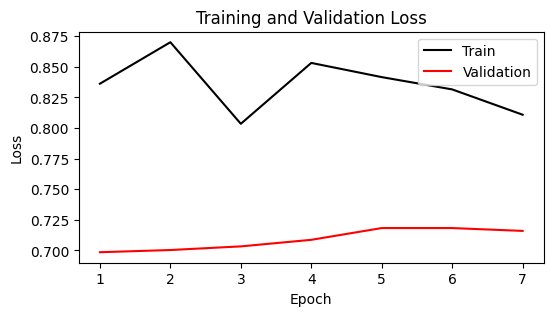

Running on: GPU

Training model #4
Running on: GPU

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 9s 171ms/step - accuracy: 0.5514 - loss: 0.8689 - precision: 0.5216 - recall: 0.5578 - val_accuracy: 0.5193 - val_loss: 0.7058 - val_precision: 0.5196 - val_recall: 0.9988 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4899 - loss: 0.8766 - precision: 0.5090 - recall: 0.4296 - val_accuracy: 0.5119 - val_loss: 0.6957 - val_precision: 0.5213 - val_recall: 0.7462 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5526 - loss: 0.8504 - precision: 0.5258 - recall: 0.5418 - val_accuracy: 0.4885 - val_loss: 0.6998 - val_precision: 0.5140 - val_recall: 0.2900 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5296 - loss: 0.9163 - precision: 0.5539 - recall: 0.4865 - val_accuracy: 0.4925 - val_loss: 0.7065 - val_precision: 0.5266 - val_recall: 0.2329 - learning_rate: 5.0000e-04
Epo

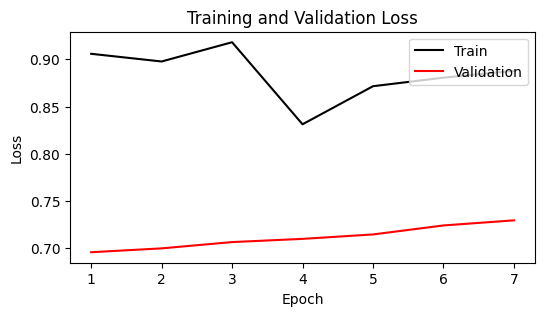

Running on: GPU

Training model #6
Running on: GPU

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 264ms/step - accuracy: 0.5218 - loss: 0.8275 - precision: 0.5624 - recall: 0.5439 - val_accuracy: 0.5117 - val_loss: 0.6942 - val_precision: 0.5210 - val_recall: 0.7513 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5029 - loss: 0.8858 - precision: 0.5219 - recall: 0.5155 - val_accuracy: 0.5209 - val_loss: 0.6939 - val_precision: 0.5236 - val_recall: 0.8669 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4594 - loss: 0.9325 - precision: 0.4865 - recall: 0.4700 - val_accuracy: 0.5246 - val_loss: 0.6947 - val_precision: 0.5254 - val_recall: 0.8828 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4626 - loss: 0.8694 - precision: 0.4496 - recall: 0.4746 - val_accuracy: 0.5264 - val_loss: 0.6955 - val_precision: 0.5260 - val_recall: 0.8978 - learning_rate: 5.0000e-04
Ep

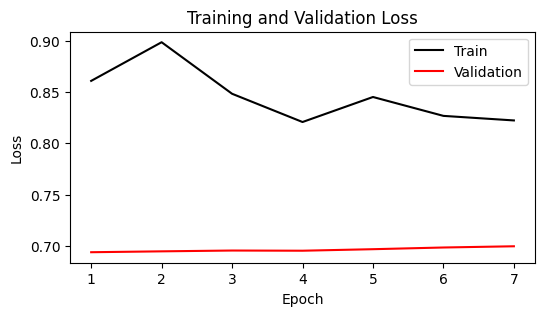

Running on: GPU

Training model #8
Running on: GPU

Epoch 1/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 267ms/step - accuracy: 0.5133 - loss: 0.8065 - precision: 0.5700 - recall: 0.5729 - val_accuracy: 0.5075 - val_loss: 0.6949 - val_precision: 0.5273 - val_recall: 0.5064 - learning_rate: 5.0000e-04
Epoch 2/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5221 - loss: 0.8704 - precision: 0.5592 - recall: 0.5104 - val_accuracy: 0.4835 - val_loss: 0.6994 - val_precision: 0.5072 - val_recall: 0.2167 - learning_rate: 5.0000e-04
Epoch 3/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.5160 - loss: 0.8137 - precision: 0.5565 - recall: 0.5491 - val_accuracy: 0.4821 - val_loss: 0.6991 - val_precision: 0.5034 - val_recall: 0.2568 - learning_rate: 5.0000e-04
Epoch 4/8
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5246 - loss: 0.8473 - precision: 0.5891 - recall: 0.5446 - val_accuracy: 0.4805 - val_loss: 0.7007 - val_precision: 0.5004 - val_recall: 0.2245 - learning_rate: 5.0000e-04
Ep

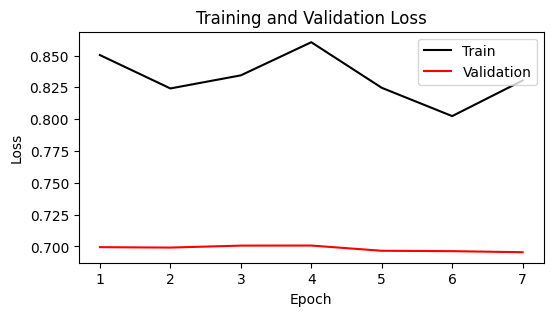

In [3]:
'''NOTE Begin training for each level-0 model'''

import _Modelset_Training
from importlib import reload

'''
Function returns a 3D list of trained models that are fit to the resepective dataset.
	Dim1:	Featurespace, here are the subsetctions/partitions for each unique set of features
	Dim2:	Samplespace, here are the subsetctions/partitions for each unique set of samples
	Dim3:	Modelspace, here are the individual models trained on a unique partition
'''
reload(_Modelset_Training)

models = _Modelset_Training.train_models(
	model_types	=	['nn']
	,data_parts	=	X_train_parts
	,findx_parts=	X_find_parts
	,trans_parts=	X_trans_parts
	,trgt_parts	=	y_parts
	,X_valid	=	X_val
	,y_valid	=	y_val
	,param_mode	=	'custom'
	,cst_mod_prm=	[{
		'optimizer_type'	:	'Adam'
		,'optimizer_kwarg':{
			'learning_rate'	:	0.0005
			#,'momentum'		:	0.9
			}
		,'time_steps'		:	5
		,'LSTM'				:	False
		,'shuffle_train'	:	True
		,'epochs'			:	8
		,'rlr_patience'		:	20
		,'architecture'	:	'default_deep'
		#,'external_cw'	:	_Utility.get_class_weights(y_train)
		}]
	,tnr_verbose=	True
	,lstm_frmt	=	lstm_format
	,use_cls_wt	=	True
)

In [4]:
'''NOTE show performances of level-0 Models'''

import _Model_Evaluation
import _Neural_Net

reload(_Model_Evaluation)
reload(_Neural_Net)

_Model_Evaluation.evaluate_models(
		models=models
		,X_findx=X_find_parts
		,X_trans=X_trans_parts
		,X_train=X_train_parts
		,y_train=y_parts
		,X_test=X_val
		,y_test=y_val
		,prfm_gnrl	=	'all'
		,prfm_stat	=	'all'
		,disp_mthd	=	'as_value'
		,test_whch	=	'independent'
		,pred_type	=	'classification'
		,lstm_frmt	=	lstm_format
)

156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Dimensions of Trained Models:
	Feature Space: 2
	Sample Space: 4
	Model Space: 1


	Displaying all performances for all independent samples: (8 cases)

4

Statistics Overall:

	Split 0:
				Avg	St.Dv.	Low	High
		Accuracy	0.52	0.01	0.5	0.53
		Precision	0.53	0.01	0.52	0.55
		Recall		0.68	0.23	0.35	1.0

Statistics By Feature Space:

	Split 0:
				Avg	St.Dv.	Low	High
		Accuracy	0.52	0.01	0.5	0.53
		Precision	0.54	0.01	0.52	0.54
		Recall		0.63	0.21	0.35	0.95
	Split 1:
				Avg	St.Dv.	Low	High
		Accuracy	0.52	0.01	0.51	0.53
		Precision	0.53	0.01	0.52	0.55
		Recall		0.72	0.24	0.37	1.0

Statistics By Sample Space:

	Split 0:
				Avg	St.Dv.	Low	High
		Accuracy	0.51	0.0	0.5	

156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
156/156 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(4989, 8)
Running on: GPU

Running on: GPU

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5108 - loss: 0.7330 - precision: 0.5303 - recall: 0.5401 - val_accuracy: 0.5190 - val_loss: 0.6925 - val_precision: 0.5670 - val_recall: 0.4422 - learning_rate: 0.0010
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4974 - loss: 0.7149 - precision: 0.5045 - recall: 0.5137 - val_accuracy: 0.5251 - val_loss: 0.6902 - val_precision: 0.5589 - val_recall: 0.5485 - learning_rate: 0.0010
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4908 - loss: 0.7090 - precision: 0.5134 - recall: 0.5140 - val_accuracy: 0.5341 - val_loss: 0

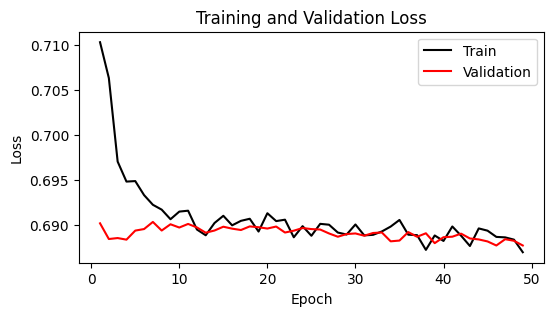

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
META-MODEL SELF TEST:
	Accuracy:	0.55
	Precision:	0.55
	Recall:		0.7


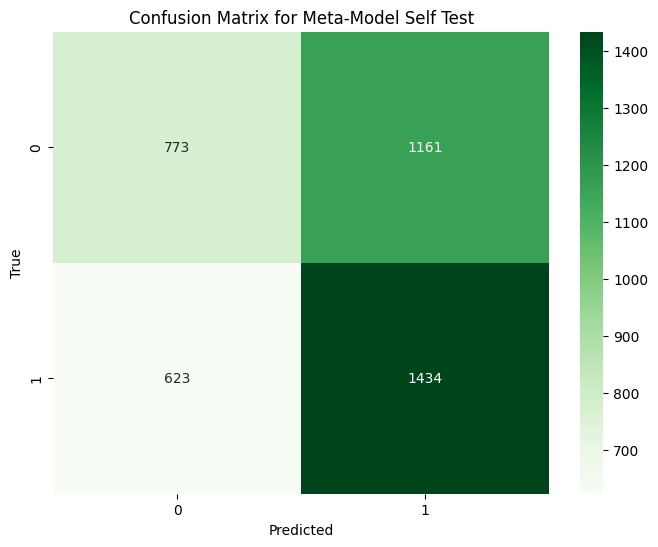

META-MODEL INDEPENDENT TEST:
	Accuracy:	0.56
	Precision:	0.58
	Recall:		0.69


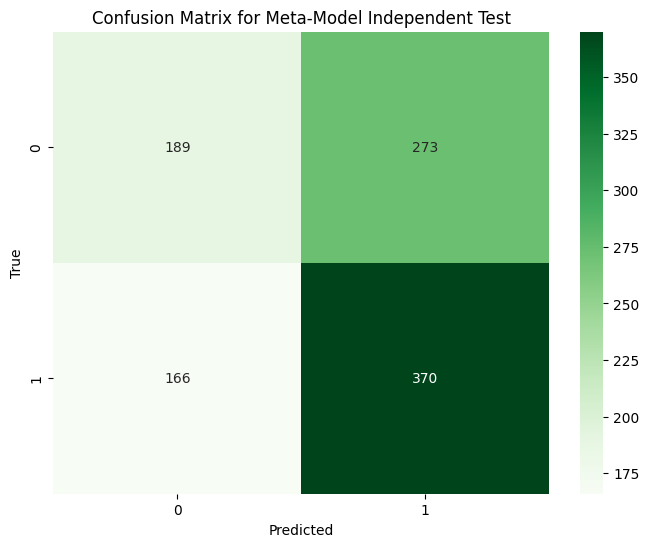

In [5]:
'''NOTE begin training for level-1 model based off of train level-0 model predictions'''

import _Metamodel
from importlib import reload
import _Utility

reload(_Metamodel)
metamodel, prediction_set = _Metamodel.train_test_meta_model(
	models		=	models
	,X_findx	=	X_find_parts
	,X_trans	=	X_trans_parts
	,X_test		=	X_val
	,y_test		=	y_val
	,val_size	=	0.2
	,shuffle	=	True
	,metam_type =	'NN'
	,use_cls_wt =	True
	,use_mm_params=	True
	,metam_params={
		'optimizer_type':	'Adam'
		,'optimizer_kwarg':{
			'learning_rate'	:	0.001
			#,'momentum':0.9
			}
		,'time_steps'		:	5
		,'LSTM'				:	False
		,'shuffle_train'	:	True
		,'epochs'			:	50
		,'batch_size'		:	30
		,'rlr_patience'		:	10
		,'architecture'	:	'default_deep'
		#,'custom_val_data'	:	(X_train, y_train)
		}
)

In [6]:
'''NOTE load in data for testing quality of level-1/2 models'''

import _Data_Processing
from importlib import reload
reload(_Data_Processing)
lstm_format = False
X_test, _, _, __,\
y_test, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		15
	,num_class	=		2
	,split_val	=		5
	,verbose	=		1
	,scaler		=		'Custom'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,indices	=		0
)

Trying to load CSV file into DataFrame...
loaded chunk 1 of size: 125400164 -> 64600164
loaded chunk 2 of size: 18408884 -> 9395364
concat chunks
concatted chunks
Success.
Size of dataset:	74083444
Trying to drop unused targets...Success.
Trying to collect indices of wanted times...Success...

# of Samples:	28670

# of Features:	519

Target:		tc_2a_15m

Trying to split DataFrame into X and y...Success.
Trying to collect all feature names and indices...Success.
Trying to clean up...Success.
Trying to encode y and make class weights...Failed [NON-FATAL: NOT IMPLEMENTED]
Trying to standardize all featurespace from training featurespace...Success.
Trying to drop unwanted time-range samples...Success.
	25577 Samples Dropped.

Trying to split X and y into Train/Validation/Independent...Success.
Trying to clean up...Success.
X_train:	(3031, 519).
y_train:	(3031,).
X_val:  	(31, 519).
y_val:  	(31,).
X_ind:  	(31, 519).
y_ind:  	(31,).
Terminating.


780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
(24943, 8)
780/780 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


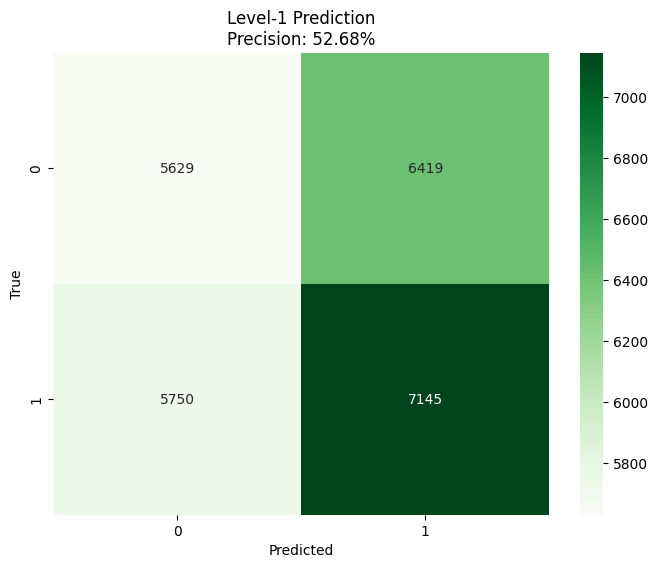

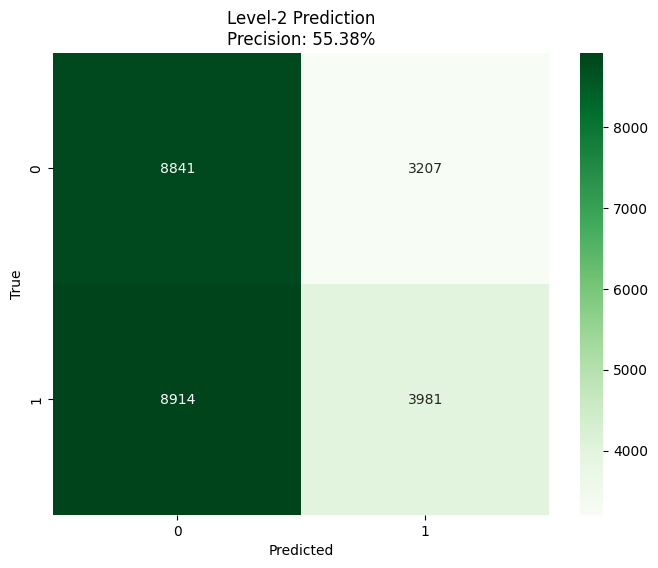

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import _Master_Model
reload(_Master_Model)
reload(_Utility)
from importlib import reload
from sklearn.svm import SVC
from _Utility import get_class_weights

shallow_master = _Master_Model.Master(
	model_depth		=	2
	,all_models 	=	[models, metamodel]
	,lvl0_formatters=	[X_find_parts, X_trans_parts]
)

pred_2 = shallow_master.master_predict(X)
cm_vals = _Utility.get_cm_values(y, pred_2)

_Utility.show_confusion_matrix(y,pred_2,title=f'Level-1 Prediction\nPrecision: {round(precision_score(y,pred_2)*100, 2)}%')

df = pd.DataFrame(X)
df['score'] = cm_vals
df['target'] = y
kept_indices = df.index[~(df['score'] % 2 == 0)].tolist()
df = df.drop(df[df['score']%2==0].index).reset_index(drop=True)
df = df.drop(columns=['score']).reset_index(drop=True)
#pd.set_option('display.max_rows',None)
co = df.corr()['target'].drop('target')
#print(co.sort_values())
p = co.nlargest(5).index.tolist()
n = co.nsmallest(5).index.tolist()
feats = p+n

df_pair = pd.DataFrame(X)
df_pair = df_pair.iloc[kept_indices].reset_index(drop=True)
df_pair = df_pair.iloc[:, feats]

X_svm = df_pair.values
y_svm = df['target'].values

clf = SVC(kernel='linear',C=1.0,class_weight=_Utility.get_class_weights(df['target'])).fit(X_svm, y_svm)

y_svmpred = pred_2#clf.predict(X_svm)
#'polishing' predictions based on if level-1 predicted (1)
for p in range(len(y_svmpred)):
	if(y_svmpred[p] == 1):
		y_svmpred[p] = clf.predict(X[p,feats].reshape(1, -1))

#_Utility.show_confusion_matrix(df['target'],y_svmpred,title=f'Level-2 Prediction\nPrecision: {round(precision_score(y_svm, y_svmpred)*100, 2)}%')
_Utility.show_confusion_matrix(y,y_svmpred,title=f'Level-2 Prediction\nPrecision: {round(precision_score(y, y_svmpred)*100, 2)}%')


In [ ]:
reload(_Master_Model)
reload(_Utility)
deep_master = _Master_Model.Master(
	model_depth		=	3
	,all_models 	=	[models, metamodel.model, clf]
	,lvl0_formatters=	[X_find_parts, X_trans_parts]
    ,lvl2_formatters=	[feats]
)

y_3pred = deep_master.master_predict(X_test)

_Utility.show_confusion_matrix(y_test, y_3pred, title=f'Accuracy: {_Utility.get_accuracy(y_test, y_3pred)}\nPrecision: {_Utility.get_precision(y_test, y_3pred)}')

In [ ]:
import _Master_Model
from importlib import reload
reload(_Master_Model)
#deep_master = _Master_Model.Master(model_depth=3)
#deep_master.load_model('pre63p2-645-800')
deep_master.save_model('models/m15_241')

In [ ]:
import _Time_Ensemble
import _Master_Model
import joblib
import _Utility

'''NOTE load in data for testing quality of level-1/2 models'''

import _Data_Processing
from importlib import reload
reload(_Data_Processing)
reload(_Master_Model)
reload(_Time_Ensemble)
lstm_format = False
X_te, _, _, __,\
y_te, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		60
	,num_class	=		2
	,split_val	=		5
	,verbose	=		0
	,scaler		=		'Custom'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,indices	=		0
)

chronos_array = _Time_Ensemble.chronos_predict(X_te, \
['pre63p2-645-800','models/m55','models/m60','models/m50'])


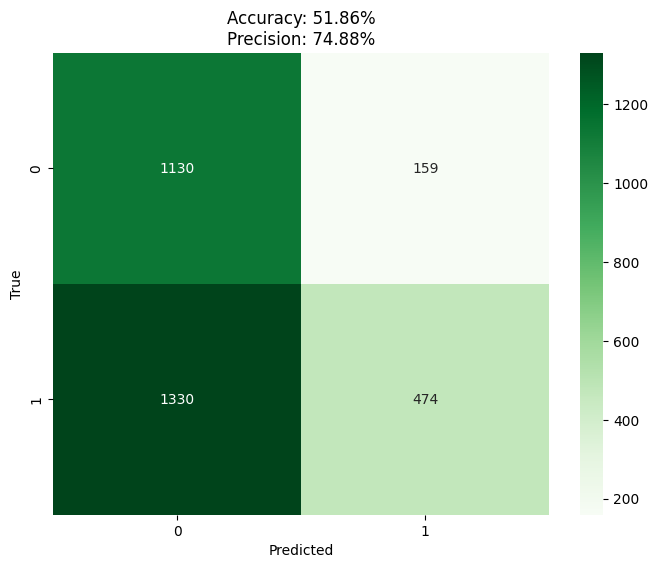

In [2]:
reload(_Utility)
reload(_Time_Ensemble)
t_pred	=	_Time_Ensemble.chronos_fusion(master_predictions=chronos_array, fusion_method='mv',vote_var=4)
_Utility.show_confusion_matrix(y_te, t_pred, title=f'Accuracy: {_Utility.get_accuracy(y_te, t_pred)}\nPrecision: {_Utility.get_precision(y_te, t_pred)}')

In [3]:
#reload(_Utility)
#reload(_Time_Ensemble)
#vals = _Utility.graph_range(_Time_Ensemble.chronos_fusion, kw='vote_var', kw_range=range(0,5), show_graph=False, master_predictions=chronos_array,fusion_method='mv')
#scores = [precision_score(y_te, vals[i]) for i in range(0,5)]
#_Utility.plot_standard_line(scores, range(0,5))

loaded chunk 1 of size: 125400164 -> 64600164
loaded chunk 2 of size: 18408884 -> 9395364
concat chunks
concatted chunks
Success.
Size of dataset:	74083444
	25577 Samples Dropped.



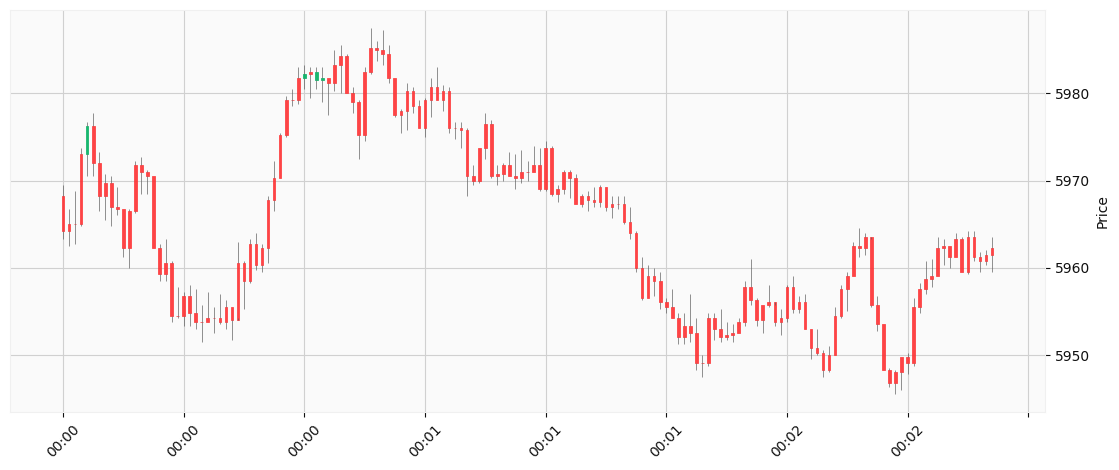

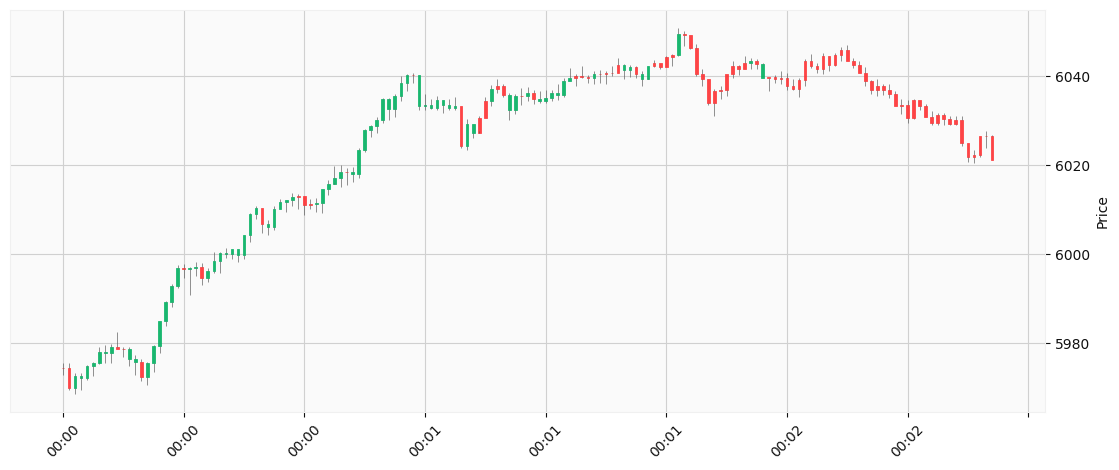

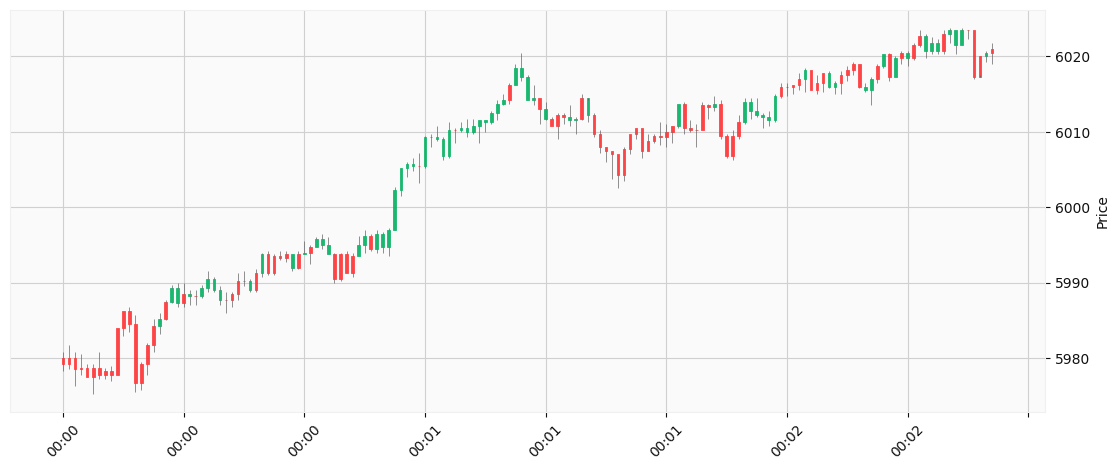

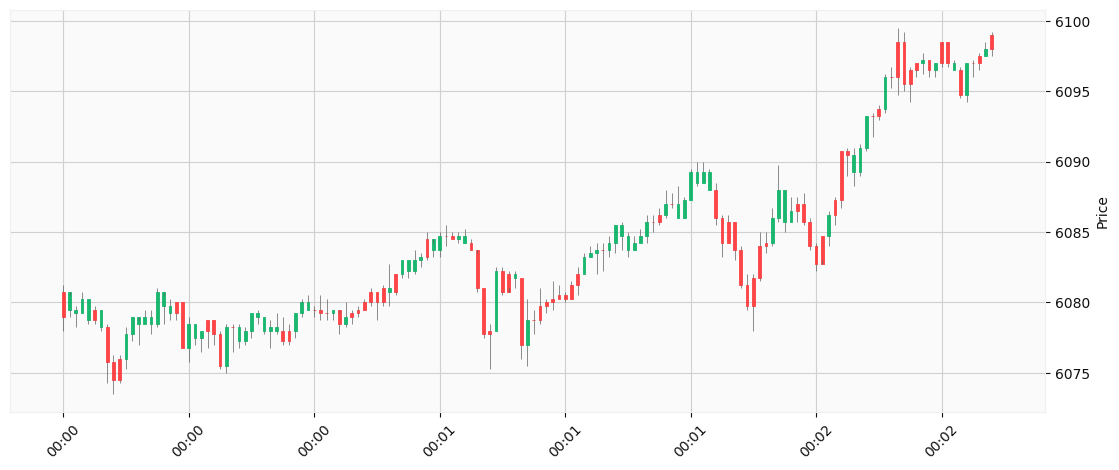

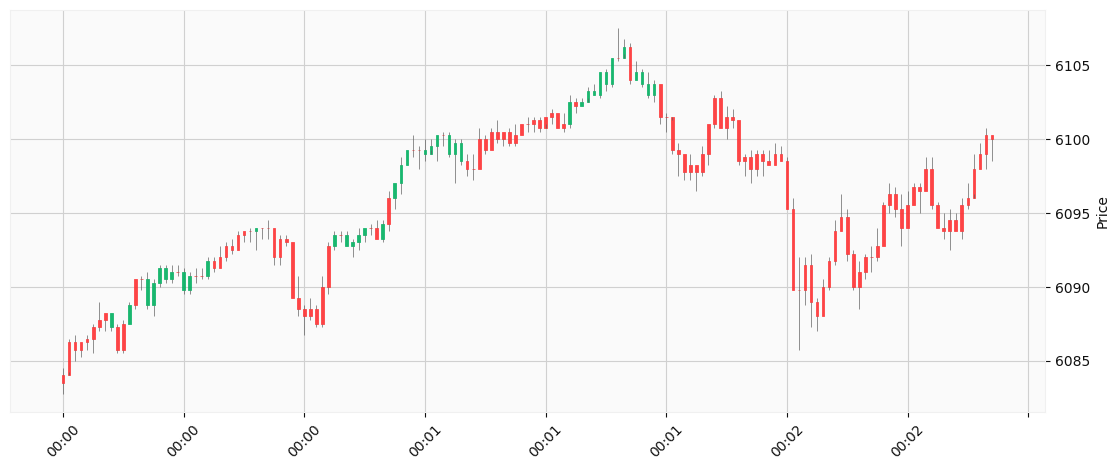

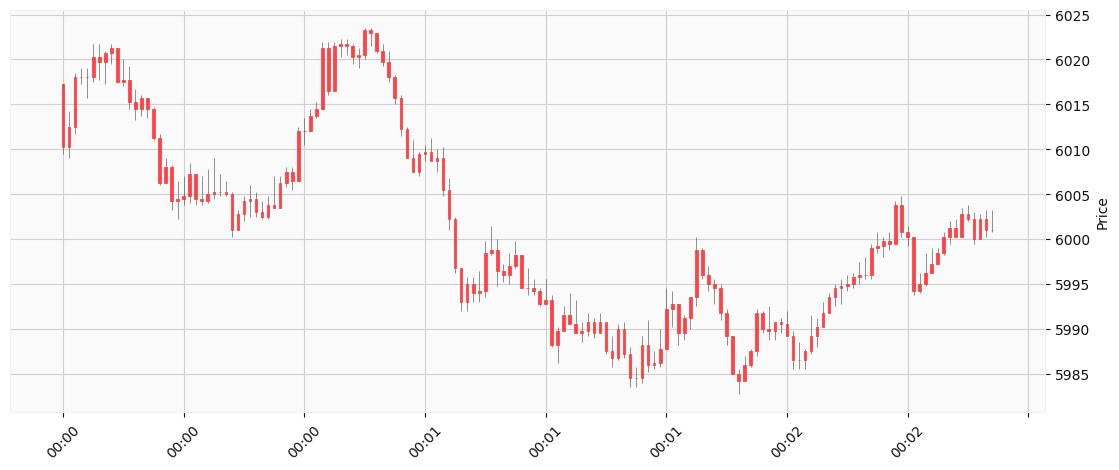

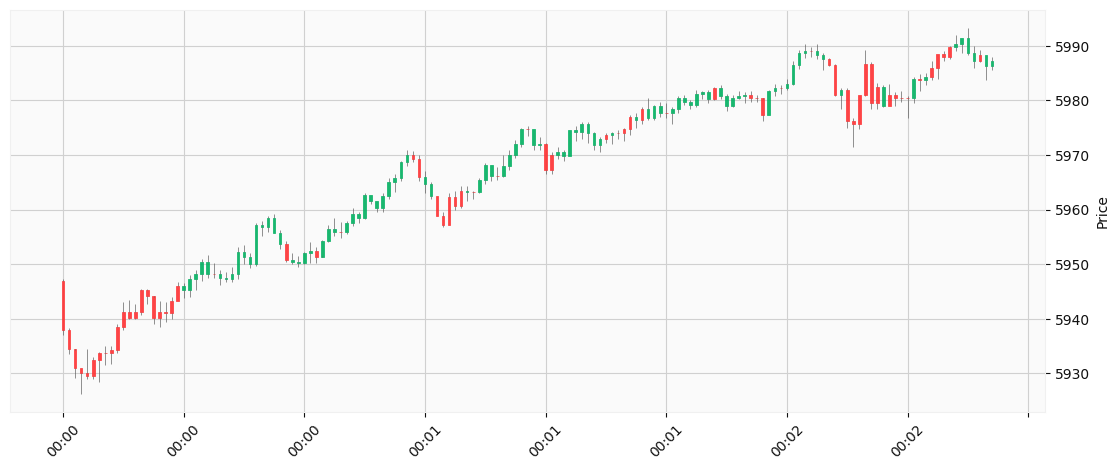

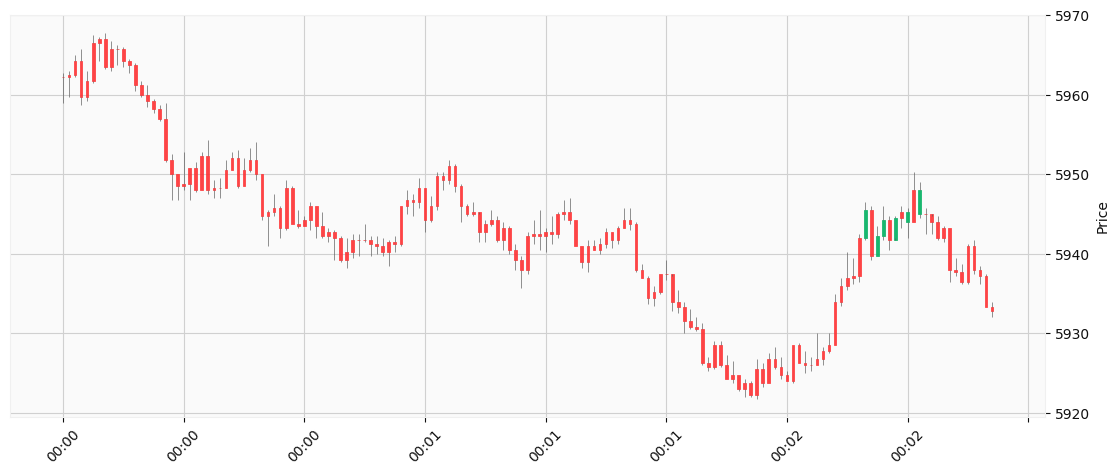

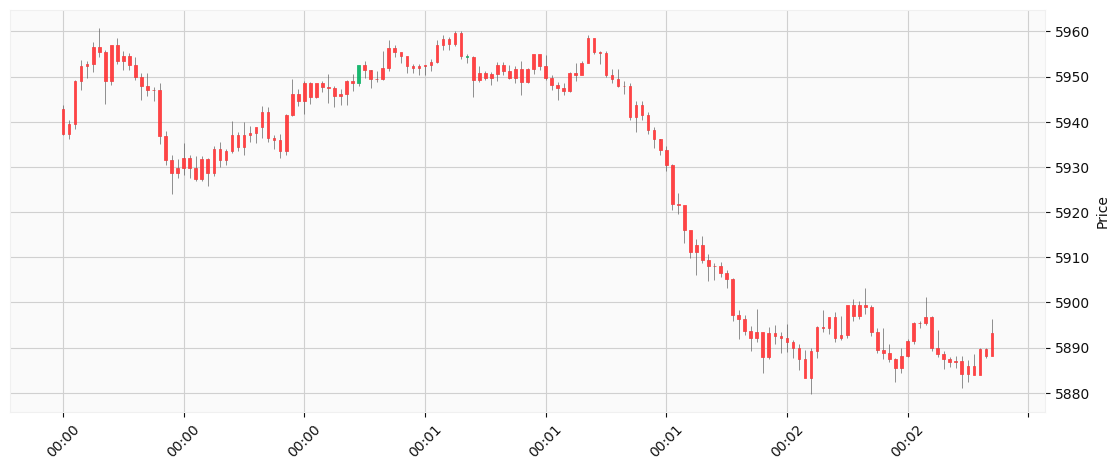

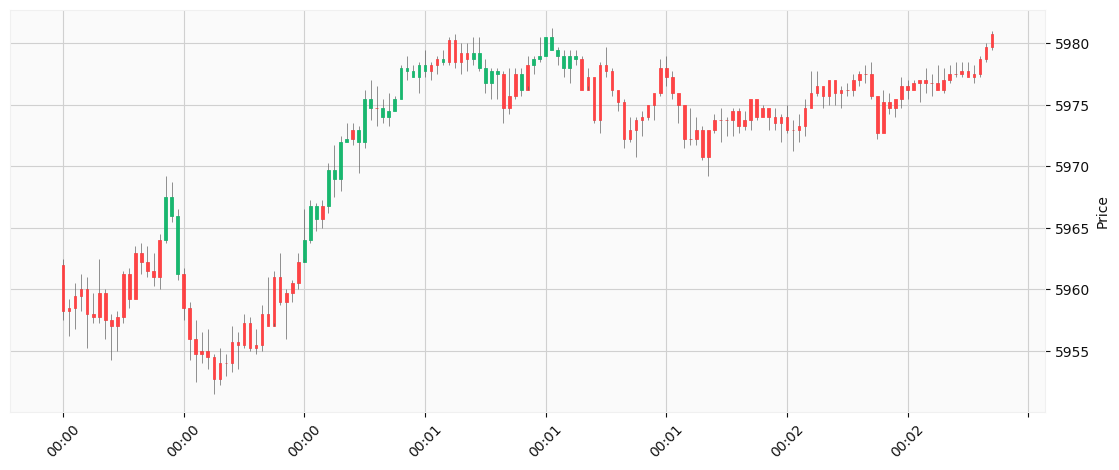

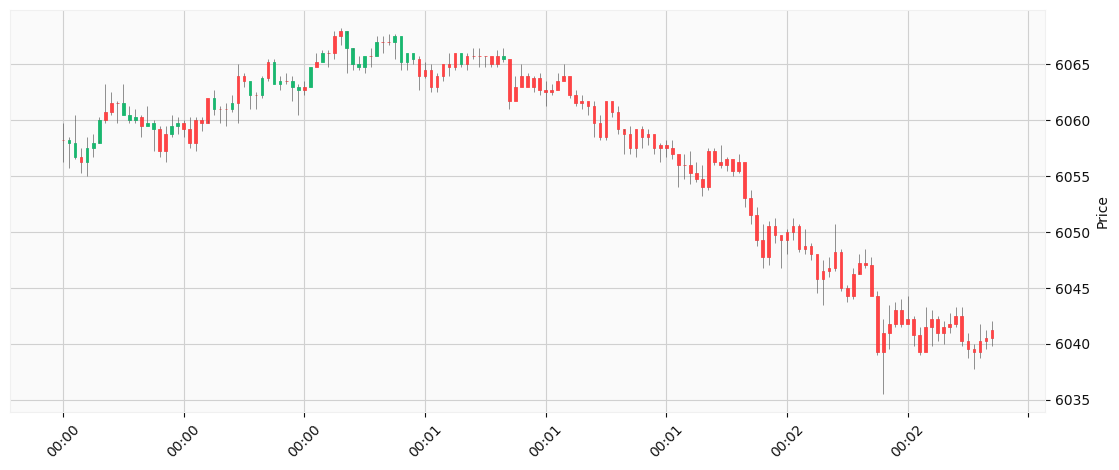

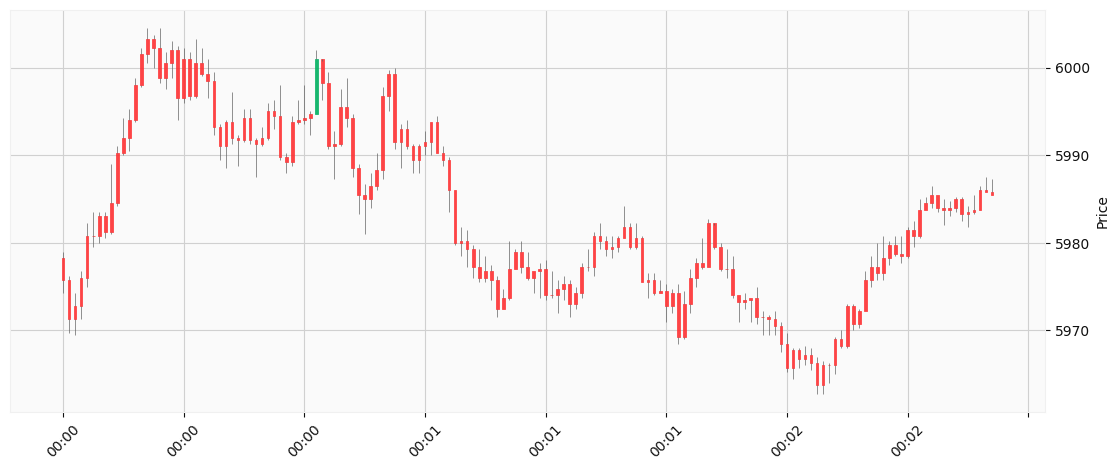

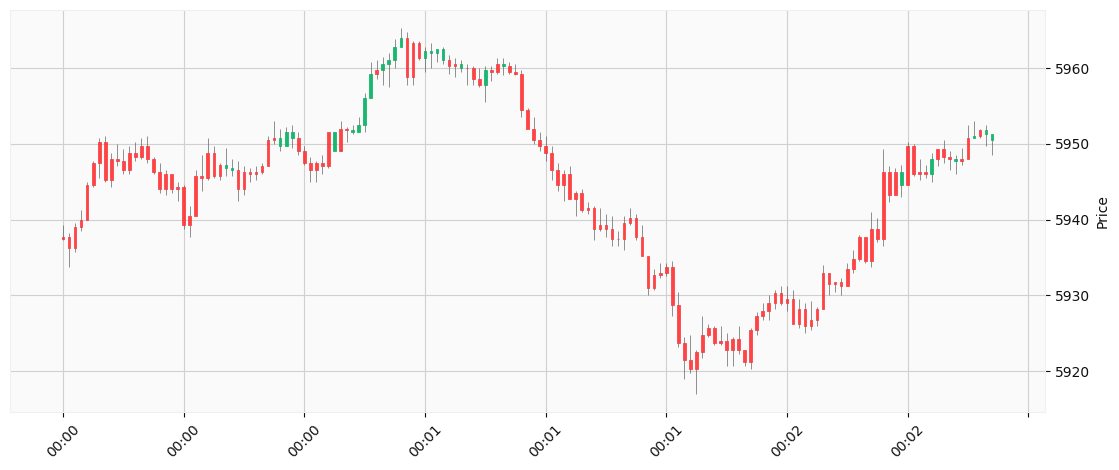

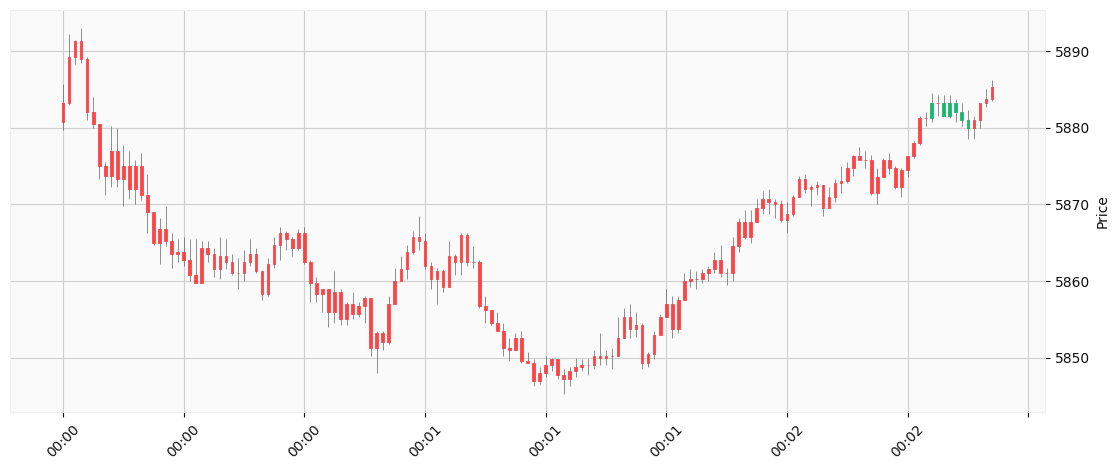

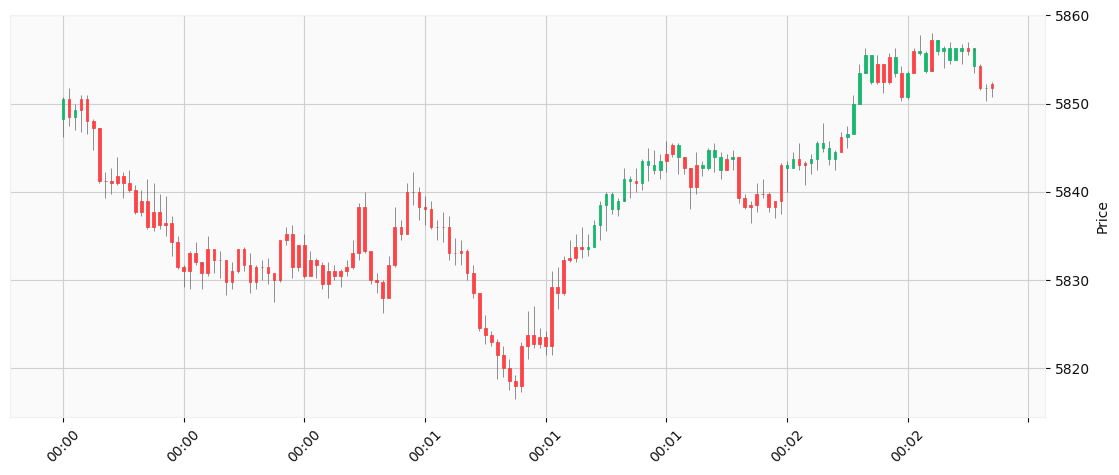

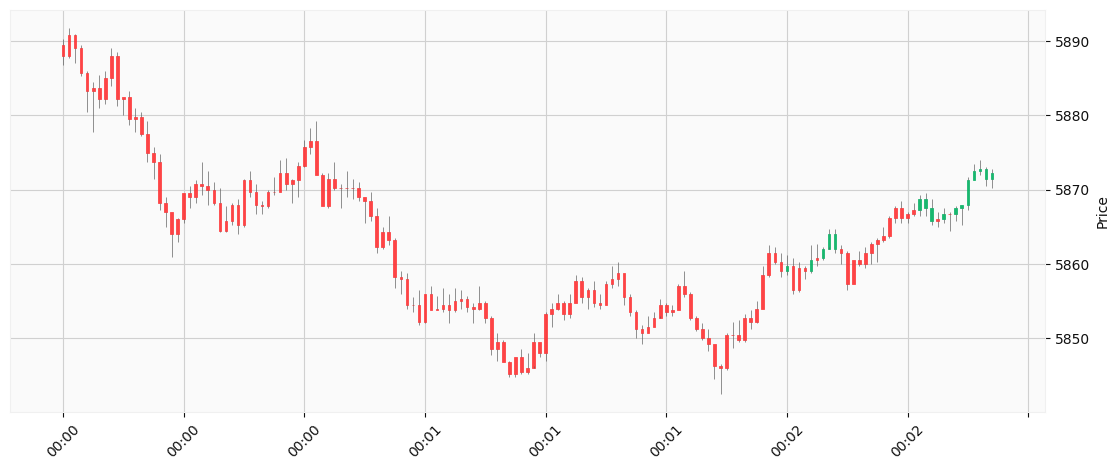

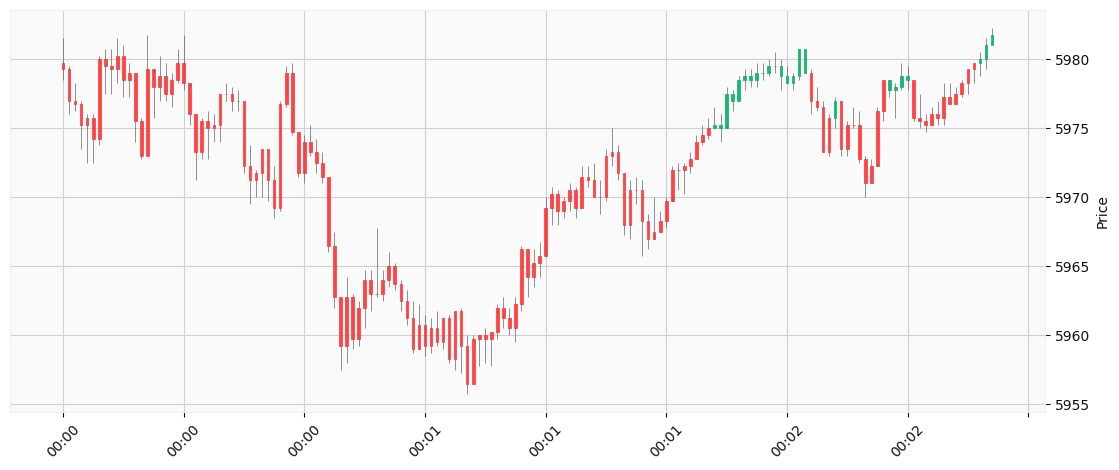

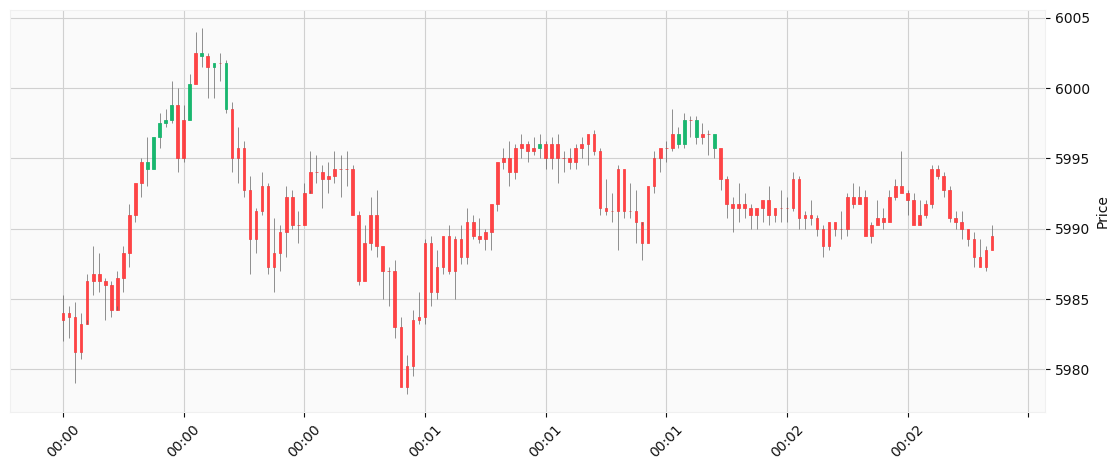

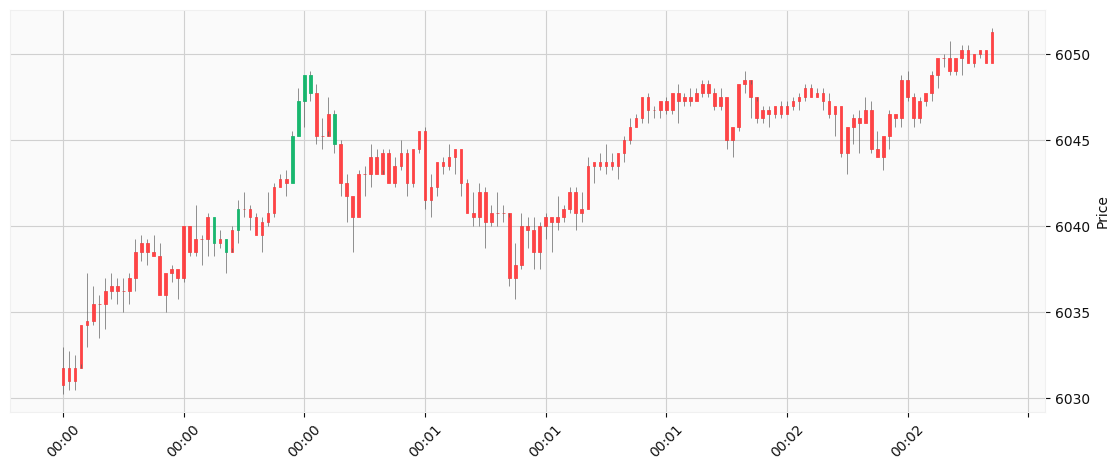

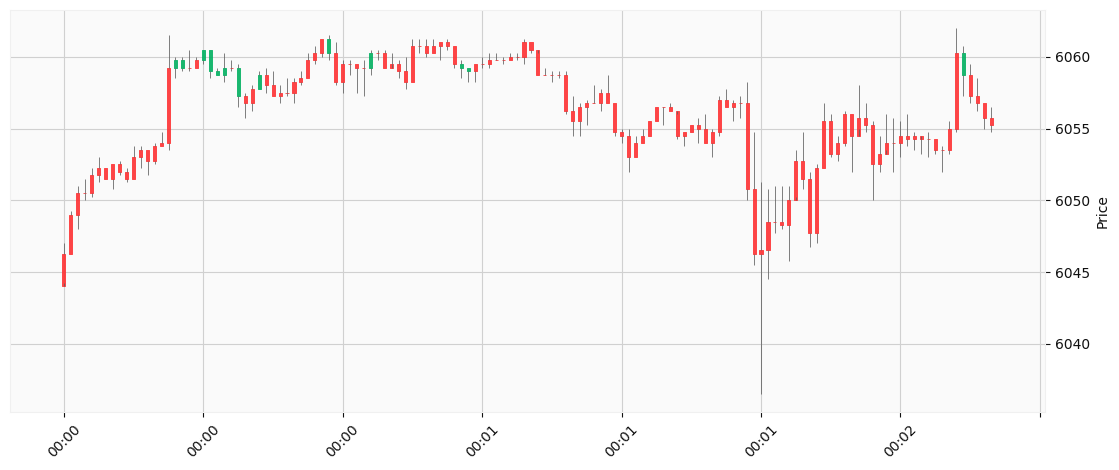

In [4]:
#showing chart of predictions
X_raw, _, _, __,\
y_raw, _, ___, ____,\
feature_subsets, scaler =\
_Data_Processing.preprocess_data(
	file_name   =		'spx_test.csv'
	,indp_size  =		0.01
	,test_size  =		0.01
	,shfl_splt	=		False
	,t_start    =		645
	,t_end		=		800
	,mod_type	=		'Area_Classification'
	,target_t	=		60
	,num_class	=		2
	,split_val	=		5
	,verbose	=		0
	,scaler		=		'None'
    ,cstm_scale	=		joblib.load('scaler/tmp.joblib')
	,frmt_lstm	=		lstm_format
	,keep_price =		True
    ,indices	=		0
)

reload(_Utility)
_Utility.show_predictions_chart(X_raw=X_raw,predictions=t_pred, t_start=645, t_end=800)